In [179]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
 

In [180]:
#Dataset with opiod deaths by rate and count. 
#Here you can find: General opioid deaths, Heroin, Fentanyl, and Prescription Opioid deaths.
all_deaths_by_county = pd.read_csv("../data/Merged_deaths_by_county_2015_2020.csv", index_col=[0])   

In [181]:
original_death = pd.read_csv("../data/Pre-merging/Opioid_Deaths_by_County_2015-2020.csv",skipinitialspace=True)

In [182]:
butte= original_death["County"]=="California"
butte.value_counts()

False    354
True       6
Name: County, dtype: int64

In [344]:
clean_death = pd.read_csv("../data/Pre-merging/Cleaned_Prescription_Opioid_Deaths_by_County_2015-2020.csv", skipinitialspace=True)
death_ready= clean_death[(clean_death["County"] !="Unknown") ]


In [345]:
death_ready

,County,Rates,Counts,Year
0,Alameda,2.73,50.0,2015
1,Alpine,0.00,0.0,2015
2,Amador,3.75,2.0,2015
3,Butte,6.51,16.0,2015
4,Calaveras,14.25,7.0,2015
...,...,...,...,...
346,Tulare,8.04,38.0,2020
347,Tuolumne,2.64,1.0,2020
349,Ventura,14.60,120.0,2020
350,Yolo,2.96,8.0,2020


In [185]:
all_deaths_by_county

,County,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
0,Alameda,3.82,68.0,2015,2.73,50.0,0.66,11.0,0.24,4.0
1,Alpine,0.00,0.0,2015,0.00,0.0,0.00,0.0,0.00,0.0
2,Amador,3.75,2.0,2015,3.75,2.0,0.00,0.0,0.00,0.0
3,Butte,7.48,18.0,2015,6.51,16.0,0.44,1.0,0.33,1.0
4,Calaveras,17.97,9.0,2015,14.25,7.0,3.28,1.0,2.81,1.0
...,...,...,...,...,...,...,...,...,...,...
325,Sutter,10.35,11.0,2020,7.75,8.0,4.74,5.0,3.83,4.0
326,Tehama,3.38,2.0,2020,1.04,1.0,2.34,1.0,1.04,1.0
327,Trinity,0.00,0.0,2020,0.00,0.0,0.00,0.0,0.00,0.0
328,Tulare,8.22,39.0,2020,8.04,38.0,0.18,1.0,6.25,29.0


In [186]:
employment_by_county = pd.read_csv("../data/Pre-merging/Cleaned_Civilian_Employment_Data_by_County_2015-2020 (1).csv")

In [187]:
employment_by_county

,Unnamed: 0,Employment,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,...,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,COUNTY
0,0,Civilian Labor Force,21450.0,21380.0,21420.0,21410.0,21760.0,21730.0,21770.0,21640.0,...,19710.0,19470.0,19730.0,19830.0,20050.0,20100.0,19900.0,19690.0,19610.0,Tuolumne
1,1,Civilian Employment,19620.0,19620.0,19700.0,19860.0,20270.0,20200.0,20220.0,20210.0,...,18100.0,18000.0,18380.0,18340.0,18570.0,18680.0,18680.0,18510.0,18540.0,Tuolumne
2,2,Civilian Unemployment,1830.0,1770.0,1720.0,1550.0,1480.0,1530.0,1550.0,1430.0,...,1610.0,1470.0,1350.0,1490.0,1480.0,1420.0,1220.0,1190.0,1070.0,Tuolumne
3,3,Civilian Unemployment Rate,8.5,8.3,8.0,7.2,6.8,7.0,7.1,6.6,...,8.2,7.6,6.8,7.5,7.4,7.0,6.1,6.0,5.4,Tuolumne
4,32,Civilian Labor Force,7600.0,7550.0,7610.0,7580.0,8100.0,8330.0,8300.0,8360.0,...,7230.0,7350.0,7830.0,8140.0,8220.0,8220.0,8000.0,7800.0,7400.0,Plumas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2727,Civilian Unemployment Rate,12.8,12.6,11.6,9.4,8.5,8.4,8.4,7.7,...,9.3,8.0,7.0,7.8,7.5,7.2,6.2,6.0,5.7,Siskiyou
252,2756,Civilian Labor Force,60900.0,61600.0,59600.0,59200.0,60000.0,60200.0,59300.0,60200.0,...,61700.0,60000.0,63300.0,63100.0,61600.0,62600.0,62500.0,61500.0,61100.0,Madera MSA (Madera County)
253,2757,Civilian Employment,53200.0,54300.0,52100.0,52600.0,53800.0,53900.0,53100.0,54600.0,...,55900.0,54400.0,58100.0,57200.0,56000.0,57400.0,57900.0,57000.0,57000.0,Madera MSA (Madera County)
254,2758,Civilian Unemployment,7600.0,7400.0,7500.0,6600.0,6300.0,6300.0,6200.0,5600.0,...,5800.0,5600.0,5200.0,5800.0,5600.0,5200.0,4500.0,4500.0,4100.0,Madera MSA (Madera County)


In [188]:
    
year_2015 = ['Jan-15','Feb-15','Mar-15','Apr-15','May-15','Jun-15','Jul-15','Aug-15','Sep-15','Oct-15','Nov-15','Dec-15']
year_2016 = ['Jan-16','Feb-16','Mar-16','Apr-16','May-16','Jun-16','Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16']
year_2017 = ['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17','Sep-17', 'Oct-17', 'Nov-17', 'Dec-17']
year_2018 = ['Jan-18', 'Feb-18', 'Mar-18','Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18','Nov-18','Dec-18']
year_2019 = ['Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19','Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19']
year_2020 = ['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20','Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20']
year_2021 = ['Jan-21', 'Feb-21','Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21','Oct-21', 'Nov-21']
     


In [189]:
employment_by_county["2015"] = employment_by_county[year_2015].transpose().mean()
employment_by_county["2016"] = employment_by_county[year_2016].transpose().mean()
employment_by_county["2017"] = employment_by_county[year_2017].transpose().mean()
employment_by_county["2018"] = employment_by_county[year_2018].transpose().mean()
employment_by_county["2019"] = employment_by_county[year_2019].transpose().mean()
employment_by_county["2020"] = employment_by_county[year_2020].transpose().mean()
employment_by_county["2021"] = employment_by_county[year_2021].transpose().mean()

In [190]:
employment_by_county

,Unnamed: 0,Employment,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,...,Oct-21,Nov-21,COUNTY,2015,2016,2017,2018,2019,2020,2021
0,0,Civilian Labor Force,21450.0,21380.0,21420.0,21410.0,21760.0,21730.0,21770.0,21640.0,...,19690.0,19610.0,Tuolumne,21533.333333,21567.500000,21383.333333,21189.166667,20930.833333,20039.166667,19797.272727
1,1,Civilian Employment,19620.0,19620.0,19700.0,19860.0,20270.0,20200.0,20220.0,20210.0,...,18510.0,18540.0,Tuolumne,20006.666667,20220.000000,20223.333333,20194.166667,19967.500000,17954.166667,18357.272727
2,2,Civilian Unemployment,1830.0,1770.0,1720.0,1550.0,1480.0,1530.0,1550.0,1430.0,...,1190.0,1070.0,Tuolumne,1527.500000,1346.666667,1161.666667,995.000000,965.000000,2085.000000,1440.000000
3,3,Civilian Unemployment Rate,8.5,8.3,8.0,7.2,6.8,7.0,7.1,6.6,...,6.0,5.4,Tuolumne,7.075000,6.233333,5.425000,4.700000,4.600000,10.441667,7.254545
4,32,Civilian Labor Force,7600.0,7550.0,7610.0,7580.0,8100.0,8330.0,8300.0,8360.0,...,7800.0,7400.0,Plumas,7890.833333,7850.833333,7769.166667,7816.666667,7878.333333,7559.166667,7680.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2727,Civilian Unemployment Rate,12.8,12.6,11.6,9.4,8.5,8.4,8.4,7.7,...,6.0,5.7,Siskiyou,9.433333,8.558333,7.333333,6.808333,6.616667,9.683333,7.672727
252,2756,Civilian Labor Force,60900.0,61600.0,59600.0,59200.0,60000.0,60200.0,59300.0,60200.0,...,61500.0,61100.0,Madera MSA (Madera County),59816.666667,61050.000000,60958.333333,61275.000000,62108.333333,61741.666667,62118.181818
253,2757,Civilian Employment,53200.0,54300.0,52100.0,52600.0,53800.0,53900.0,53100.0,54600.0,...,57000.0,57000.0,Madera MSA (Madera County),53483.333333,55416.666667,55966.666667,56900.000000,57741.666667,55100.000000,56781.818182
254,2758,Civilian Unemployment,7600.0,7400.0,7500.0,6600.0,6300.0,6300.0,6200.0,5600.0,...,4500.0,4100.0,Madera MSA (Madera County),6333.333333,5658.333333,4991.666667,4383.333333,4350.000000,6650.000000,5318.181818


In [191]:
#The data in the year columns represents an average of the data from tweleve months of a given year.
#The average for 2021 is calculated from Jan to Nov, there were no Dec values available.

employment_by_county = employment_by_county.drop(employment_by_county.columns[0], axis = 1)
employment_by_county = employment_by_county.drop(employment_by_county.columns[1:84], axis = 1)

#employment_by_county.to_csv('../data/Pre-merging/Clean_employment_by_year.csv')

In [192]:
employment_by_county

,Employment,COUNTY,2015,2016,2017,2018,2019,2020,2021
0,Civilian Labor Force,Tuolumne,21533.333333,21567.500000,21383.333333,21189.166667,20930.833333,20039.166667,19797.272727
1,Civilian Employment,Tuolumne,20006.666667,20220.000000,20223.333333,20194.166667,19967.500000,17954.166667,18357.272727
2,Civilian Unemployment,Tuolumne,1527.500000,1346.666667,1161.666667,995.000000,965.000000,2085.000000,1440.000000
3,Civilian Unemployment Rate,Tuolumne,7.075000,6.233333,5.425000,4.700000,4.600000,10.441667,7.254545
4,Civilian Labor Force,Plumas,7890.833333,7850.833333,7769.166667,7816.666667,7878.333333,7559.166667,7680.000000
...,...,...,...,...,...,...,...,...,...
251,Civilian Unemployment Rate,Siskiyou,9.433333,8.558333,7.333333,6.808333,6.616667,9.683333,7.672727
252,Civilian Labor Force,Madera MSA (Madera County),59816.666667,61050.000000,60958.333333,61275.000000,62108.333333,61741.666667,62118.181818
253,Civilian Employment,Madera MSA (Madera County),53483.333333,55416.666667,55966.666667,56900.000000,57741.666667,55100.000000,56781.818182
254,Civilian Unemployment,Madera MSA (Madera County),6333.333333,5658.333333,4991.666667,4383.333333,4350.000000,6650.000000,5318.181818


In [193]:
employment = pd.melt(employment_by_county, id_vars = ["Employment","COUNTY"], value_vars = ["2015","2016","2017","2018","2019","2020"], 
        var_name = "Year"
)

In [194]:
employment

,Employment,COUNTY,Year,value
0,Civilian Labor Force,Tuolumne,2015,21533.333333
1,Civilian Employment,Tuolumne,2015,20006.666667
2,Civilian Unemployment,Tuolumne,2015,1527.500000
3,Civilian Unemployment Rate,Tuolumne,2015,7.075000
4,Civilian Labor Force,Plumas,2015,7890.833333
...,...,...,...,...
1531,Civilian Unemployment Rate,Siskiyou,2020,9.683333
1532,Civilian Labor Force,Madera MSA (Madera County),2020,61741.666667
1533,Civilian Employment,Madera MSA (Madera County),2020,55100.000000
1534,Civilian Unemployment,Madera MSA (Madera County),2020,6650.000000


In [195]:
pivoted = employment.pivot(index=["COUNTY","Year"], columns = "Employment", values= 'value').reset_index()

In [196]:
pivoted

Employment,COUNTY,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate
0,Alameda,2015,779891.666667,819016.666667,39108.333333,4.775000
1,Alameda,2016,796025.000000,831816.666667,35791.666667,4.325000
2,Alameda,2017,807658.333333,838700.000000,31041.666667,3.700000
3,Alameda,2018,815691.666667,841483.333333,25783.333333,3.066667
4,Alameda,2019,815883.333333,841083.333333,25191.666667,3.000000
...,...,...,...,...,...,...
379,Yuba City MSA (Sutter and Yuba Counties),2016,66341.666667,73141.666667,6791.666667,9.316667
380,Yuba City MSA (Sutter and Yuba Counties),2017,67658.333333,73741.666667,6091.666667,8.283333
381,Yuba City MSA (Sutter and Yuba Counties),2018,68750.000000,74075.000000,5366.666667,7.216667
382,Yuba City MSA (Sutter and Yuba Counties),2019,69958.333333,75208.333333,5250.000000,6.975000


In [197]:
pivoted = pivoted.rename_axis('', axis="columns")
ready_to_merge_employment = pivoted.rename({"COUNTY":"County"}, axis = 1)
ready_to_merge_employment["Year"] = ready_to_merge_employment["Year"].astype(int)

In [198]:
county_city_list=[]
string = "("

for value in ready_to_merge_employment["County"]:
    if string in value:
        county_city_list.append(value)
    else:
        pass
    

Metropolitan Statistical Areas (MSA) is a geographical area with a population of 50,000 or more, plus adjacent territory that has a high degree of social and economic integration with the core as measured by commuting ties.

Metropolitan Division (MD) is a county or group of counties (or equivalent entities) delineated within a larger metropolitan statistical area, provided that the larger metropolitan statistical area contains a single core with a population of at least 2.5 million and other criteria are met. A Metropolitan Division consists of one or more main/secondary counties that represent an employment center or centers, plus adjacent counties associated with the main/secondary county or counties through commuting ties.

In [254]:
string_2= "County)"
only_county = []
for item in county_city_list:
    if string_2 in item:
        only_county.append(item)
    else:
        pass 
    

In [297]:
def unique(only_county):
    x = np.array(only_county)
    return (np.unique(x))



In [298]:
county_unique = unique(only_county)


In [204]:
string_3= "Counties)"
only_counties = []
for item in county_city_list:
    if string_3 in item:
        only_counties.append(item)
    else:
        pass 

In [249]:
counties_unique= unique(only_counties)

In [244]:
final_county=[]


for x in ready_to_merge_employment["County"]:
    if x not in counties_unique:
        final_county.append(x)
     


In [262]:
county_unique= list(county_unique)

In [326]:
substring,msa = ("(","MSA")
no_extra_county=[]


for county_name in final_county:
    if substring in county_name:
        sans_p = county_name[county_name.find("(")+1:county_name.find(" County)")]
        no_extra_county.append(sans_p)
        
    elif msa in county_name:
        no_msa= county_name.replace(" MSA","")
        no_extra_county.append(no_msa)
        
    else:
        no_extra_county.append(county_name)
       

In [331]:
counties_unique

array(['Oakland Hayward Berkeley MD (Alameda and Contra Costa Counties)',
       'Riverside San Bernardino Ontario MSA (Riverside and San Bernardino Counties)',
       'Sacramento Roseville Arden Arcade MSA (El Dorado Placer Sacramento and Yolo Counties)',
       'San Francisco Redwood City South San Francisco MD (San Francisco and San Mateo Counties)',
       'San Jose Sunnyvale Santa Clara MSA (San Benito and Santa Clara Counties)',
       'Yuba City MSA (Sutter and Yuba Counties)'], dtype='<U88')

In [341]:
employment= ready_to_merge_employment[  ready_to_merge_employment['County'].map(lambda x: x not in counties_unique)  ]

In [342]:
employment["County"]=no_extra_county

<ipython-input-342-316abf9e0533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment["County"]=no_extra_county


In [343]:
employment

,County,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate
0,Alameda,2015,779891.666667,819016.666667,39108.333333,4.775000
1,Alameda,2016,796025.000000,831816.666667,35791.666667,4.325000
2,Alameda,2017,807658.333333,838700.000000,31041.666667,3.700000
3,Alameda,2018,815691.666667,841483.333333,25783.333333,3.066667
4,Alameda,2019,815883.333333,841083.333333,25191.666667,3.000000
...,...,...,...,...,...,...
373,Yuba,2016,25716.666667,28150.000000,2450.000000,8.641667
374,Yuba,2017,26583.333333,28733.333333,2150.000000,7.475000
375,Yuba,2018,27341.666667,29233.333333,1883.333333,6.466667
376,Yuba,2019,27900.000000,29725.000000,1841.666667,6.225000


In [352]:
employment_death= pd.merge(employment,death_ready, on=("County","Year"))

In [353]:
employment_death

,County,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates,Counts
0,Alameda,2015,779891.666667,819016.666667,39108.333333,4.775000,2.73,50.0
1,Alameda,2016,796025.000000,831816.666667,35791.666667,4.325000,2.18,39.0
2,Alameda,2017,807658.333333,838700.000000,31041.666667,3.700000,1.36,25.0
3,Alameda,2018,815691.666667,841483.333333,25783.333333,3.066667,2.28,42.0
4,Alameda,2019,815883.333333,841083.333333,25191.666667,3.000000,4.33,78.0
...,...,...,...,...,...,...,...,...
341,Yuba,2016,25716.666667,28150.000000,2450.000000,8.641667,3.72,2.0
342,Yuba,2017,26583.333333,28733.333333,2150.000000,7.475000,7.63,5.0
343,Yuba,2018,27341.666667,29233.333333,1883.333333,6.466667,4.45,3.0
344,Yuba,2019,27900.000000,29725.000000,1841.666667,6.225000,7.95,6.0


In [355]:
employment_death= employment_death.rename(columns={"Civilian Employment":"Employment",
                                 "Civilian Labor Force":"Labor Force",
                                 "Civilian Unemployment":"Unemployment",
                                 "Civilian Unemployment Rate":"Unemployment Rate",
                                 "Rates":"Opioid Death Rate",
                                  "Counts":"Opioid Death"})

In [382]:
employment_death.to_csv('../data/Merged_complete_employment_death.csv')

In [359]:
employment_death.corr()

,Year,Employment,Labor Force,Unemployment,Unemployment Rate,Opioid Death Rate,Opioid Death
Year,1.000000,-0.005258,-0.001809,0.046372,0.077320,0.247232,0.177720
Employment,-0.005258,1.000000,0.999477,0.878001,-0.147083,-0.056831,0.776391
Labor Force,-0.001809,0.999477,1.000000,0.893022,-0.135186,-0.053284,0.789053
Unemployment,0.046372,0.878001,0.893022,1.000000,0.045806,0.002153,0.875093
Unemployment Rate,0.077320,-0.147083,-0.135186,0.045806,1.000000,0.074952,-0.016196
Opioid Death Rate,0.247232,-0.056831,-0.053284,0.002153,0.074952,1.000000,0.201464
Opioid Death,0.177720,0.776391,0.789053,0.875093,-0.016196,0.201464,1.000000


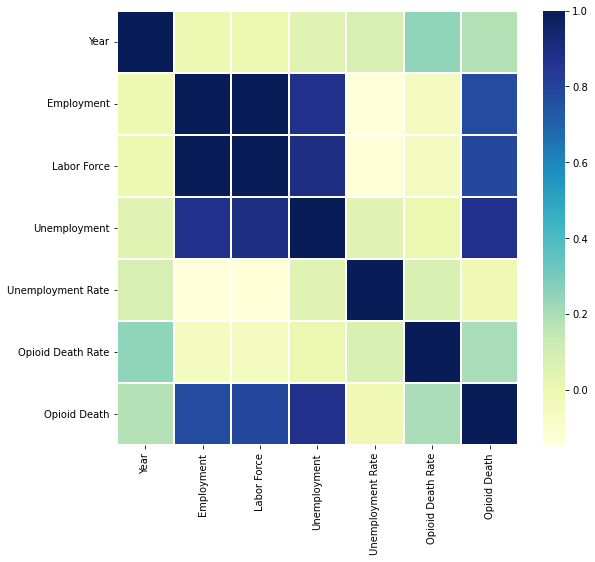

In [361]:
corrmatrix = employment_death.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1);

In [365]:
employment_2020= employment_death[employment_death["Year"]==2020]

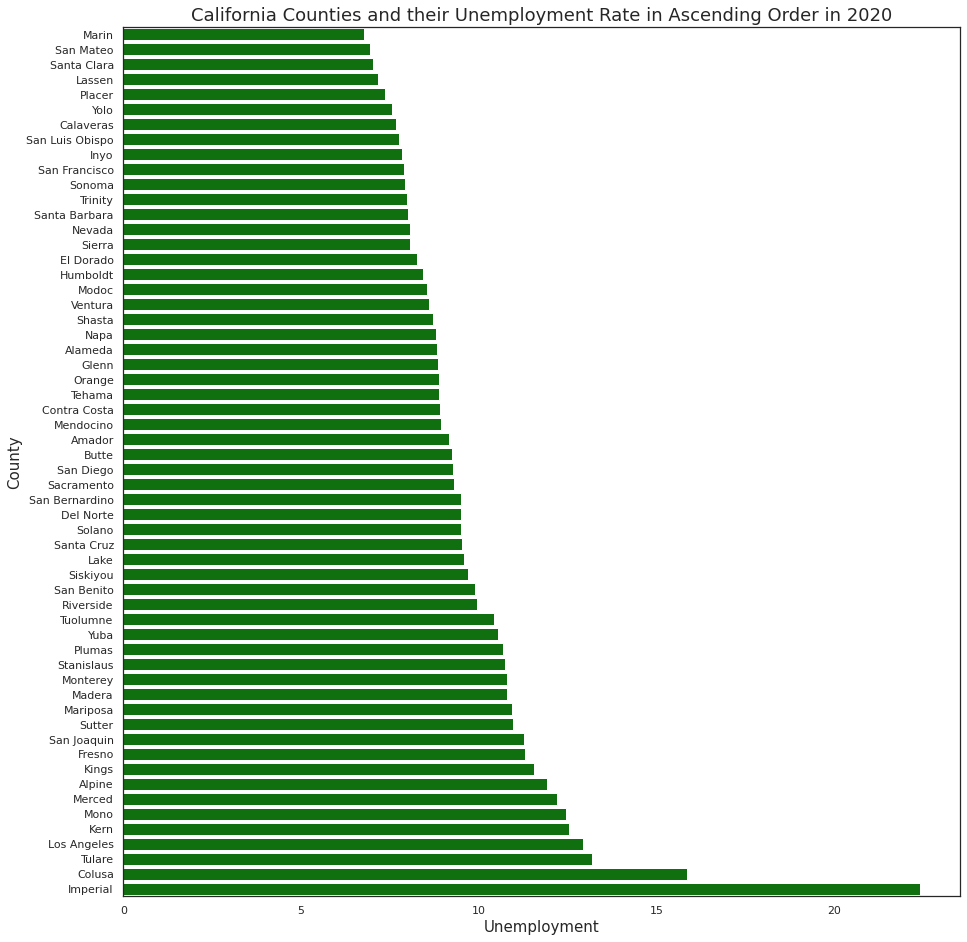

In [368]:
#Plotting a horizontal barplot
sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
employment_death_2020 = sns.barplot(x= employment_2020["Unemployment Rate"], 
                                  y= employment_2020["County"],
                                  order= employment_2020.sort_values("Unemployment Rate").County,
                                  orient= "h",
                                  color= "green")
#Plotting the median
#plt.axvline(x= county_median,
            #color='red')
#set labels
plt.xlabel("Unemployment", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Unemployment Rate in Ascending Order in 2020", size=18);

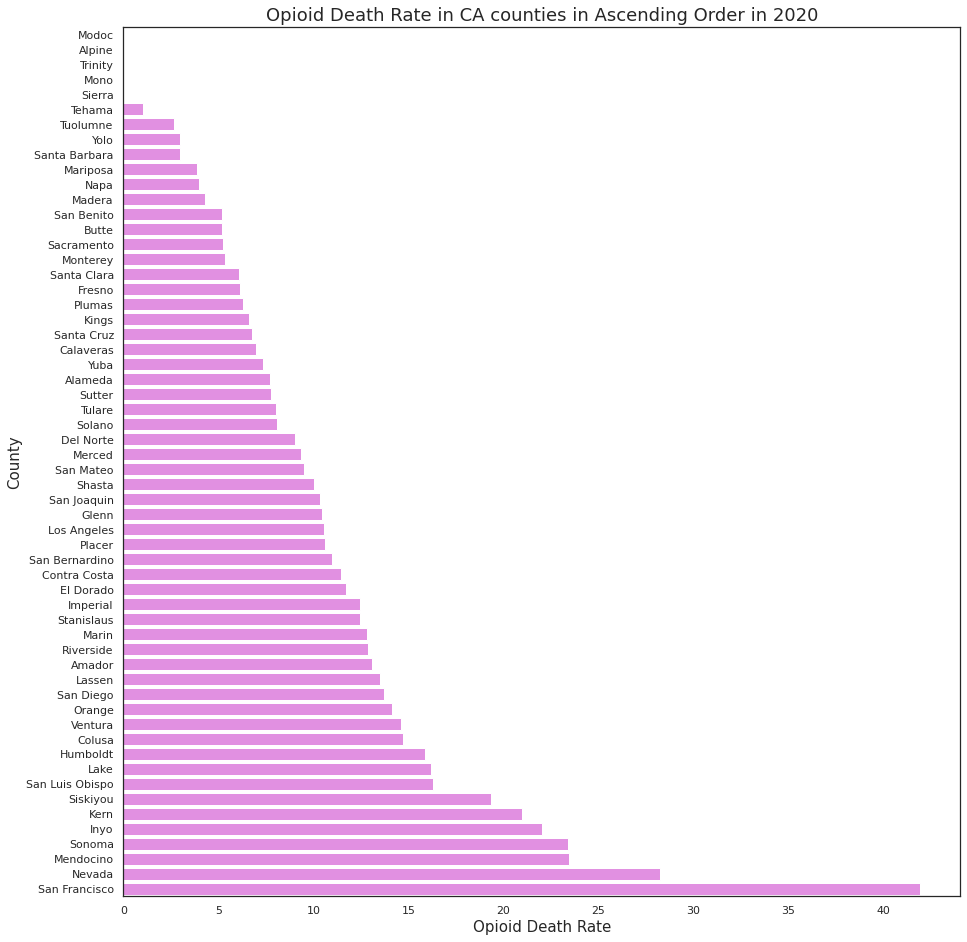

In [379]:
#Plotting a horizontal barplot
sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
employment_death_2020 = sns.barplot(x= employment_2020["Opioid Death Rate"], 
                                  y= employment_2020["County"],
                                  order= employment_2020.sort_values("Opioid Death Rate").County,
                                  orient= "h",
                                  color= "violet")
#Plotting the median
#plt.axvline(x= county_median,
            #color='red')
#set labels
plt.xlabel("Opioid Death Rate", size=15)
plt.ylabel("County", size=15)
plt.title("Opioid Death Rate in CA counties in Ascending Order in 2020", size=18);

Text(0.5, 1.0, 'County History')

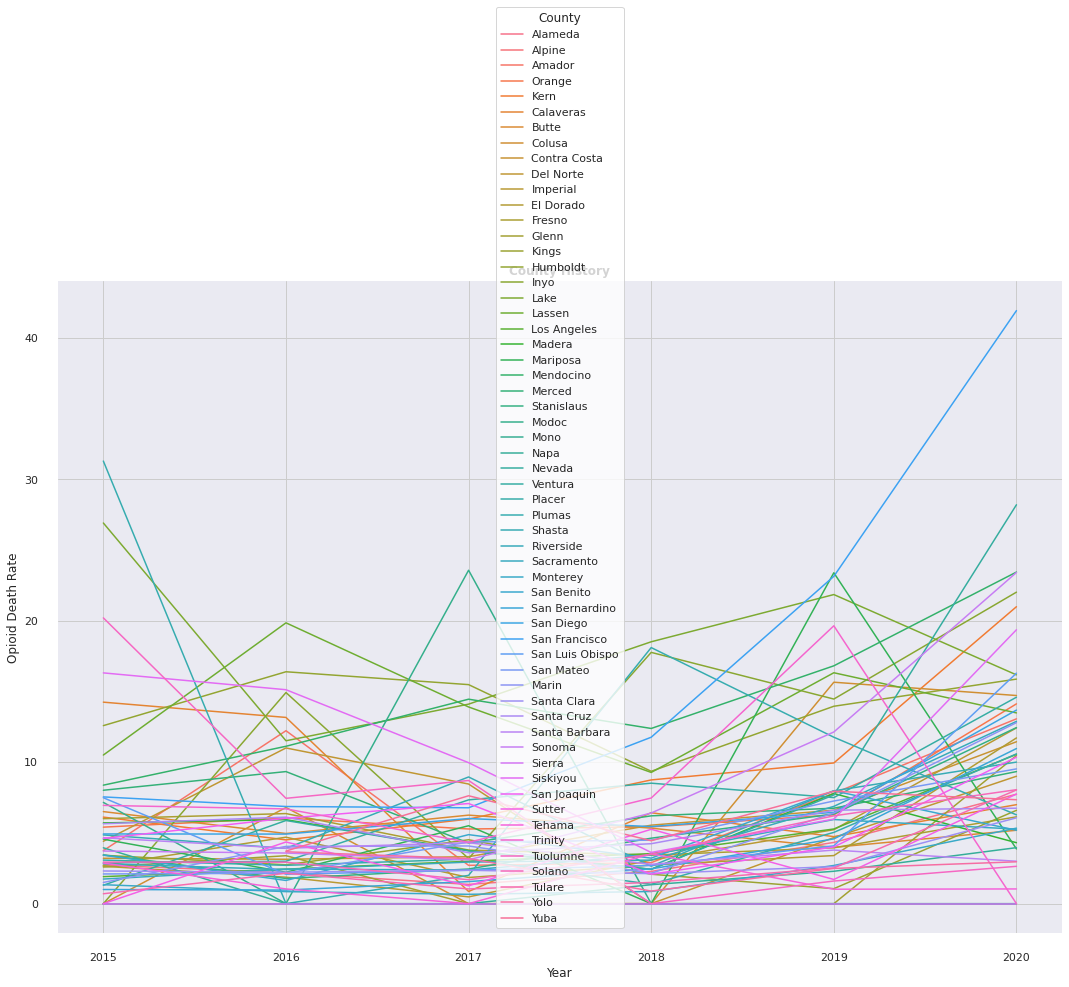

In [376]:
#this can be cleaner but its getting there

    sns.set() #defaults the background
    fig, ax = plt.subplots()
    sns.set(style="ticks") 
    sns.lineplot(x="Year",y="Opioid Death Rate",hue= "County",data= employment_death, color= "Blue",legend="brief")  # column is chosen here
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(18,12)
    ax.set_title('{} History'.format(i), fontweight='bold')

In [91]:
#I changed the initial employment table that I was working with so it contained all counties 
#so the paths to the code below might not work anymore.
employment_and_opioid = pd.merge(ready_to_merge_employment, all_deaths_by_county, on= ["County","Year"])

In [92]:
employment_and_opioid["County"]= employment_and_opioid["County"].astype(str)

In [192]:
employment_and_opioid

,County,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates_opioid,Counts_opioid,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
0,Alameda,2015,779891.666667,819016.666667,39108.333333,4.775000,3.82,68.0,2.73,50.0,0.66,11.0,0.24,4.0
1,Alameda,2016,796025.000000,831816.666667,35791.666667,4.325000,2.81,51.0,2.18,39.0,0.38,7.0,0.50,9.0
2,Alameda,2017,807658.333333,838700.000000,31041.666667,3.700000,2.03,37.0,1.36,25.0,0.36,7.0,0.32,6.0
3,Alameda,2018,815691.666667,841483.333333,25783.333333,3.066667,3.10,56.0,2.28,42.0,0.44,8.0,0.80,14.0
4,Alameda,2019,815883.333333,841083.333333,25191.666667,3.000000,5.75,103.0,4.33,78.0,1.43,25.0,3.15,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Tuolumne,2016,20220.000000,21567.500000,1346.666667,6.233333,11.34,7.0,7.45,5.0,2.77,1.0,1.12,1.0
194,Tuolumne,2017,20223.333333,21383.333333,1161.666667,5.425000,9.47,5.0,8.71,4.0,0.75,1.0,0.00,0.0
195,Tuolumne,2018,20194.166667,21189.166667,995.000000,4.700000,2.52,1.0,0.00,0.0,2.52,1.0,0.00,0.0
196,Tuolumne,2019,19967.500000,20930.833333,965.000000,4.600000,1.60,2.0,1.60,2.0,0.78,1.0,0.78,1.0


In [94]:
employment_and_opioid.corr()

,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates_opioid,Counts_opioid,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
Year,1.000000,0.002759,0.006237,0.065076,0.095712,0.162791,0.206259,0.190396,0.233101,0.177293,0.136966,0.408159,0.298185
Civilian Employment,0.002759,1.000000,0.999674,0.888063,-0.338271,-0.107825,0.709709,-0.123579,0.630584,-0.019527,0.788328,0.073606,0.459694
Civilian Labor Force,0.006237,0.999674,1.000000,0.899510,-0.327181,-0.104680,0.717905,-0.120212,0.639349,-0.018650,0.792829,0.079217,0.470686
Civilian Unemployment,0.065076,0.888063,0.899510,1.000000,-0.102671,-0.039766,0.782018,-0.049844,0.721526,-0.001677,0.785768,0.166838,0.608867
Civilian Unemployment Rate,0.095712,-0.338271,-0.327181,-0.102671,1.000000,0.040390,-0.138836,0.092992,-0.107358,-0.145928,-0.210709,0.099232,0.003564
Rates_opioid,0.162791,-0.107825,-0.104680,-0.039766,0.040390,1.000000,0.257391,0.970432,0.296711,0.613892,0.146473,0.682350,0.316569
Counts_opioid,0.206259,0.709709,0.717905,0.782018,-0.138836,0.257391,1.000000,0.251734,0.986721,0.186445,0.912080,0.505658,0.928488
Rates_pres,0.190396,-0.123579,-0.120212,-0.049844,0.092992,0.970432,0.251734,1.000000,0.302364,0.475030,0.114142,0.702793,0.332123
Counts_pres,0.233101,0.630584,0.639349,0.721526,-0.107358,0.296711,0.986721,0.302364,1.000000,0.185559,0.838052,0.563703,0.965344
Rates_heroin,0.177293,-0.019527,-0.018650,-0.001677,-0.145928,0.613892,0.186445,0.475030,0.185559,1.000000,0.205583,0.428073,0.181801


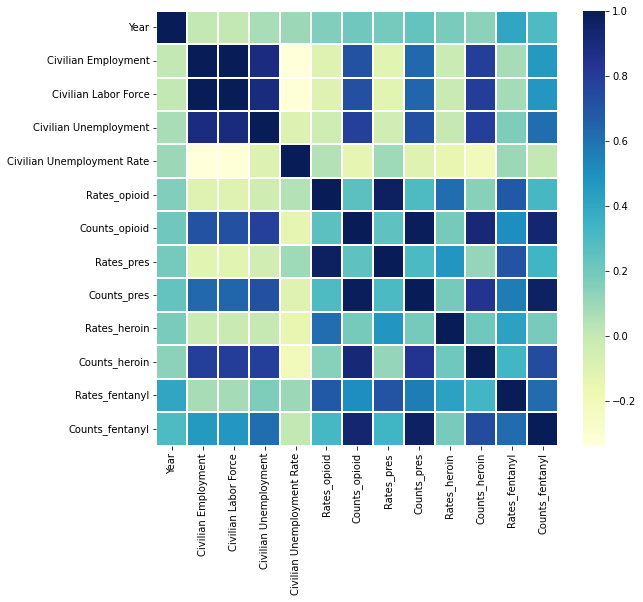

In [95]:
corrmat = employment_and_opioid.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1);

In [96]:
opioid_death = employment_and_opioid['Counts_opioid']
unemployment = employment_and_opioid['Civilian Unemployment']

In [97]:
opioid_death.corr(unemployment)

0.7820178406197841

In [98]:
scipy.stats.linregress(opioid_death, unemployment)

LinregressResult(slope=237.8203959751299, intercept=3114.851391099837, rvalue=0.7820178406197842, pvalue=4.123755356573317e-42, stderr=13.538510941790811, intercept_stderr=929.4980280489472)

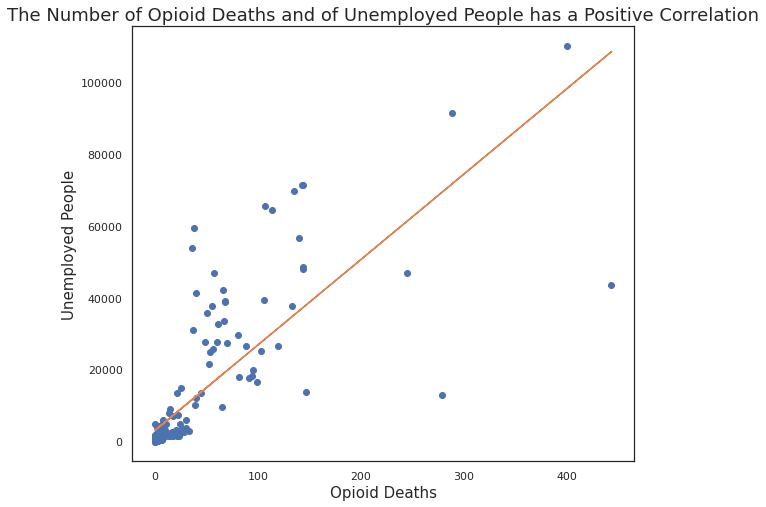

In [195]:
f, ax = plt.subplots(figsize =(9, 8))
plt.plot(opioid_death,unemployment, 'o')
m, b = np.polyfit(opioid_death,unemployment, 1)
plt.plot(opioid_death, m*opioid_death + b)

plt.xlabel("Opioid Deaths", size=15)
plt.ylabel("Unemployed People", size=15)
plt.title("The Number of Opioid Deaths and of Unemployed People has a Positive Correlation", size=18);

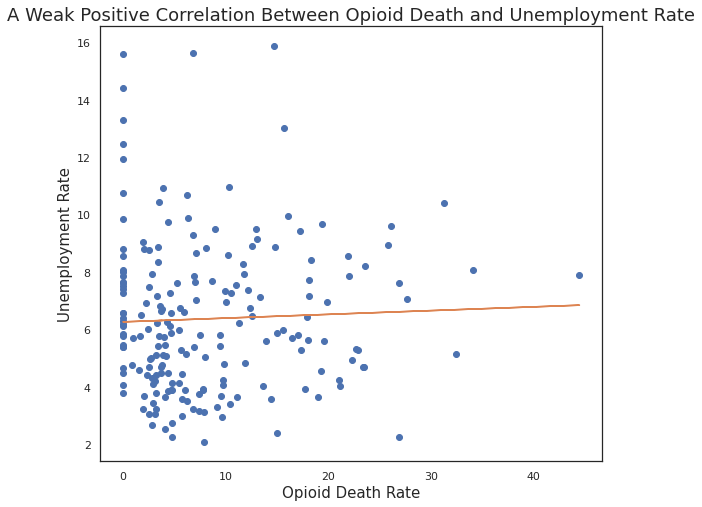

In [197]:
opioid_rate = employment_and_opioid["Rates_opioid"]
unemployment_rate = employment_and_opioid["Civilian Unemployment Rate"]


f, ax = plt.subplots(figsize =(9, 8))
plt.plot(opioid_rate,unemployment_rate, 'o')
m, b = np.polyfit(opioid_rate,unemployment_rate, 1)
plt.plot(opioid_rate, m*opioid_rate + b)

plt.xlabel("Opioid Death Rate", size=15)
plt.ylabel("Unemployment Rate", size=15)
plt.title("A Weak Positive Correlation Between Opioid Death and Unemployment Rate", size=18);

In [201]:
employment_2020 = employment_and_opioid[employment_and_opioid["Year"] == 2020]

In [202]:
employment_2020

,County,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates_opioid,Counts_opioid,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
5,Alameda,2020,742416.666667,8.138000e+05,71383.333333,8.825000,8.09,144.0,7.74,138.0,0.85,14.0,6.60,117.0
11,Alpine,2020,460.000000,5.183333e+02,59.166667,11.925000,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
17,Amador,2020,13105.833333,1.442500e+04,1317.500000,9.166667,13.07,4.0,13.07,4.0,3.36,1.0,6.71,2.0
23,Calaveras,2020,19588.333333,2.120833e+04,1620.000000,7.658333,7.00,2.0,7.00,2.0,0.00,0.0,3.12,1.0
29,Colusa,2020,8825.000000,1.050083e+04,1675.833333,15.866667,14.72,3.0,14.72,3.0,0.00,0.0,6.09,1.0
35,Contra Costa,2020,493241.666667,5.412417e+05,48033.333333,8.916667,12.61,144.0,11.45,130.0,1.28,15.0,9.77,108.0
41,Del Norte,2020,8467.500000,9.350000e+03,884.166667,9.500000,9.01,3.0,9.01,3.0,4.55,1.0,9.01,3.0
47,El Dorado,2020,83266.666667,9.075000e+04,7483.333333,8.275000,11.72,22.0,11.72,22.0,0.64,1.0,5.35,10.0
53,Glenn,2020,11455.833333,1.256917e+04,1113.333333,8.858333,14.87,3.0,10.47,2.0,4.40,1.0,4.88,1.0
59,Humboldt,2020,54450.000000,5.942500e+04,4958.333333,8.416667,18.34,24.0,15.88,21.0,4.07,5.0,7.88,10.0


In [206]:
employment_2020["County"].count()

33

In [208]:
employment_2020["Counts_opioid"]

5      144.0
11       0.0
17       4.0
23       2.0
29       3.0
35     144.0
41       3.0
47      22.0
53       3.0
59      24.0
65       3.0
71      17.0
77       7.0
83       1.0
89      20.0
95       0.0
101      0.0
107     30.0
113     45.0
119      1.0
125    400.0
131    107.0
137      4.0
143    288.0
149    443.0
155     81.0
161    143.0
167      0.0
173      7.0
179     11.0
185      2.0
191      0.0
197      2.0
Name: Counts_opioid, dtype: float64

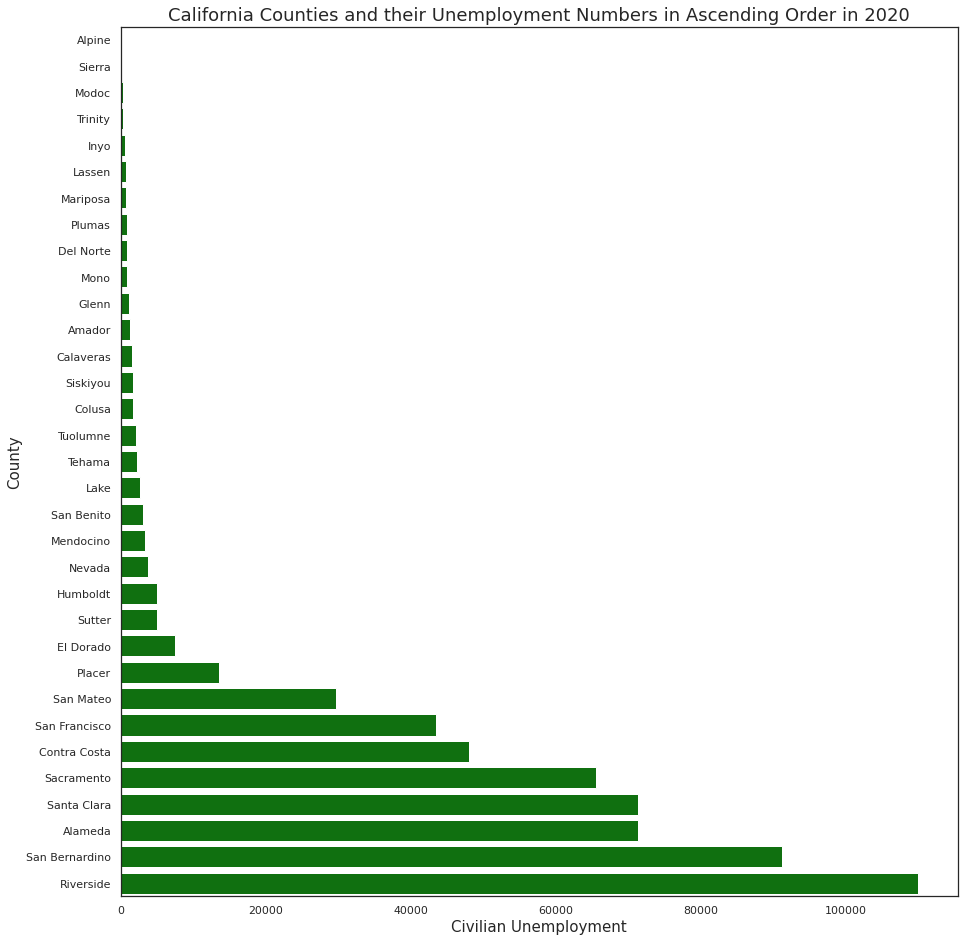

In [205]:
#Plotting a horizontal barplot
sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
poverty_by_counties = sns.barplot(x= employment_2020["Civilian Unemployment"], 
                                  y= employment_2020["County"],
                                  order= employment_2020.sort_values("Civilian Unemployment").County,
                                  orient= "h",
                                  color= "green")
#Plotting the median
#plt.axvline(x= county_median,
            #color='red')
#set labels
plt.xlabel("Civilian Unemployment", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Unemployment Numbers in Ascending Order in 2020", size=18);

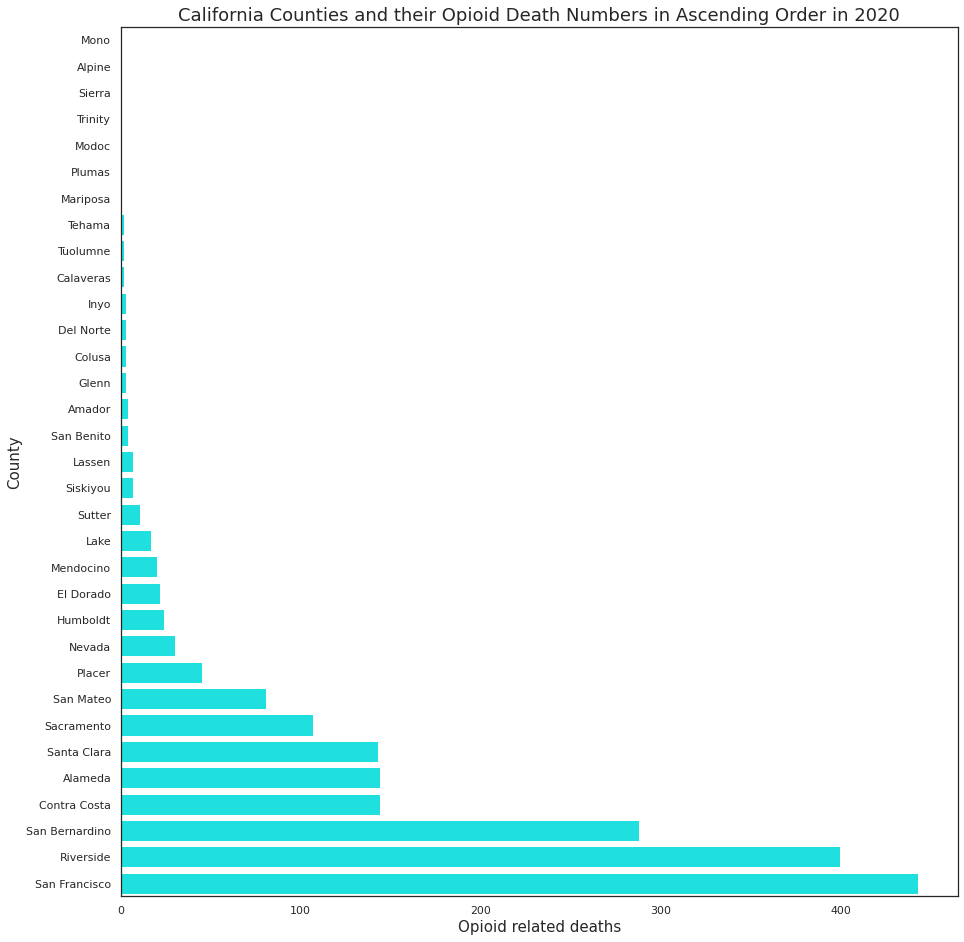

In [211]:
#Plotting a horizontal barplot
sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
poverty_by_counties = sns.barplot(x= employment_2020["Counts_opioid"], 
                                  y= employment_2020["County"],
                                  order= employment_2020.sort_values("Counts_opioid").County,
                                  orient= "h",
                                  color= "aqua")
#Plotting the median
#plt.axvline(x= county_median,
            #color='red')
#set labels
plt.xlabel("Opioid related deaths", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Opioid Death Numbers in Ascending Order in 2020", size=18);

In [101]:
death_per_county = employment_and_opioid.groupby(["County"])["Counts_opioid"].sum()

In [102]:
unemployed_per_county = employment_and_opioid.groupby(["County"])["Civilian Unemployment"].sum()

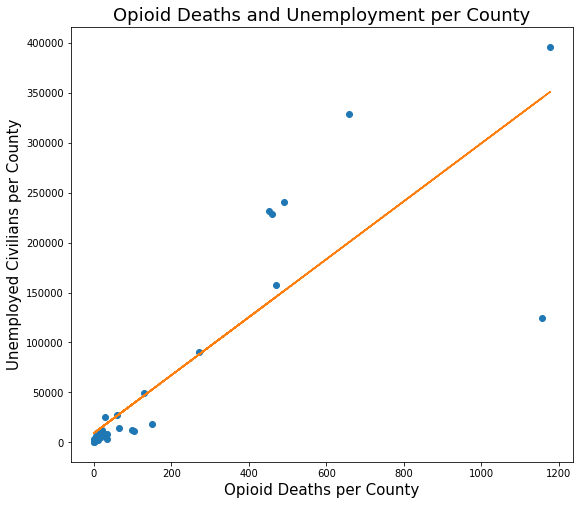

In [103]:

f, ax = plt.subplots(figsize =(9, 8))
plt.plot(death_per_county,unemployed_per_county, 'o')
m, b = np.polyfit(death_per_county,unemployed_per_county, 1)
plt.plot(death_per_county, m*death_per_county + b)

plt.xlabel("Opioid Deaths per County", size=15)
plt.ylabel("Unemployed Civilians per County", size=15)
plt.title("Opioid Deaths and Unemployment per County", size=18);

In [190]:
unemployed_rate_per_county = employment_and_opioid.groupby(["County"])["Civilian Unemployment Rate"].sum()
death_rate_per_county = employment_and_opioid.groupby(["County"])["Rates_opioid"].sum()

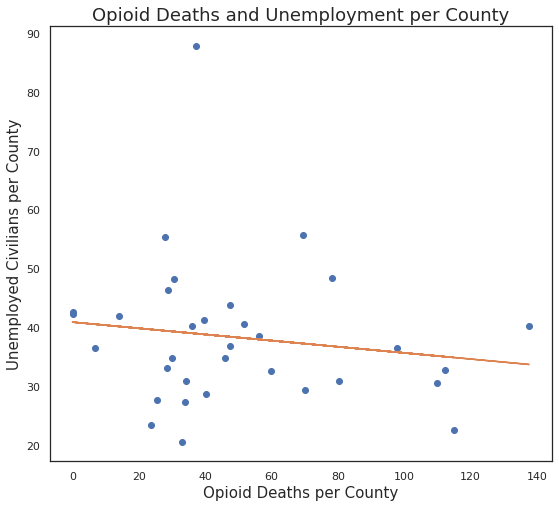

In [191]:
f, ax = plt.subplots(figsize =(9, 8))
plt.plot(death_rate_per_county,unemployed_rate_per_county, 'o')
m, b = np.polyfit(death_rate_per_county,unemployed_rate_per_county, 1)
plt.plot(death_rate_per_county, m*death_rate_per_county + b)

plt.xlabel("Opioid Deaths Rate per County", size=15)
plt.ylabel("Unemployed Civilians Rate per County", size=15)
plt.title("Opioid Deaths and Unemployment per County", size=18);

In [104]:
death_per_county.corr(unemployed_per_county)

0.8563476503274923

In [105]:
county_population = pd.read_csv("../data/Pre-merging/California_counties_population.csv")

no_commas = county_population["Population"].str.replace(",","")
county_population["Population"] = no_commas.astype(float)

county_population["County"] = county_population["County"].astype(str)

In [106]:
emp_op_pop = pd.merge(employment_and_opioid, county_population, on= ["County"])

In [107]:
emp_op_pop

,County,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates_opioid,Counts_opioid,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl,Population
0,Alameda,2015,779891.666667,819016.666667,39108.333333,4.775000,3.82,68.0,2.73,50.0,0.66,11.0,0.24,4.0,1682353.0
1,Alameda,2016,796025.000000,831816.666667,35791.666667,4.325000,2.81,51.0,2.18,39.0,0.38,7.0,0.50,9.0,1682353.0
2,Alameda,2017,807658.333333,838700.000000,31041.666667,3.700000,2.03,37.0,1.36,25.0,0.36,7.0,0.32,6.0,1682353.0
3,Alameda,2018,815691.666667,841483.333333,25783.333333,3.066667,3.10,56.0,2.28,42.0,0.44,8.0,0.80,14.0,1682353.0
4,Alameda,2019,815883.333333,841083.333333,25191.666667,3.000000,5.75,103.0,4.33,78.0,1.43,25.0,3.15,56.0,1682353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Tuolumne,2016,20220.000000,21567.500000,1346.666667,6.233333,11.34,7.0,7.45,5.0,2.77,1.0,1.12,1.0,55620.0
194,Tuolumne,2017,20223.333333,21383.333333,1161.666667,5.425000,9.47,5.0,8.71,4.0,0.75,1.0,0.00,0.0,55620.0
195,Tuolumne,2018,20194.166667,21189.166667,995.000000,4.700000,2.52,1.0,0.00,0.0,2.52,1.0,0.00,0.0,55620.0
196,Tuolumne,2019,19967.500000,20930.833333,965.000000,4.600000,1.60,2.0,1.60,2.0,0.78,1.0,0.78,1.0,55620.0


In [108]:
emp_op_pop.corr()

,Year,Civilian Employment,Civilian Labor Force,Civilian Unemployment,Civilian Unemployment Rate,Rates_opioid,Counts_opioid,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl,Population
Year,1.000000e+00,0.002759,0.006237,0.065076,0.095712,0.162791,0.206259,0.190396,0.233101,0.177293,0.136966,0.408159,0.298185,-3.573737e-14
Civilian Employment,2.759288e-03,1.000000,0.999674,0.888063,-0.338271,-0.107825,0.709709,-0.123579,0.630584,-0.019527,0.788328,0.073606,0.459694,9.903431e-01
Civilian Labor Force,6.236589e-03,0.999674,1.000000,0.899510,-0.327181,-0.104680,0.717905,-0.120212,0.639349,-0.018650,0.792829,0.079217,0.470686,9.921202e-01
Civilian Unemployment,6.507624e-02,0.888063,0.899510,1.000000,-0.102671,-0.039766,0.782018,-0.049844,0.721526,-0.001677,0.785768,0.166838,0.608867,9.173037e-01
Civilian Unemployment Rate,9.571193e-02,-0.338271,-0.327181,-0.102671,1.000000,0.040390,-0.138836,0.092992,-0.107358,-0.145928,-0.210709,0.099232,0.003564,-2.968814e-01
Rates_opioid,1.627915e-01,-0.107825,-0.104680,-0.039766,0.040390,1.000000,0.257391,0.970432,0.296711,0.613892,0.146473,0.682350,0.316569,-1.191090e-01
Counts_opioid,2.062588e-01,0.709709,0.717905,0.782018,-0.138836,0.257391,1.000000,0.251734,0.986721,0.186445,0.912080,0.505658,0.928488,6.972020e-01
Rates_pres,1.903962e-01,-0.123579,-0.120212,-0.049844,0.092992,0.970432,0.251734,1.000000,0.302364,0.475030,0.114142,0.702793,0.332123,-1.370679e-01
Counts_pres,2.331010e-01,0.630584,0.639349,0.721526,-0.107358,0.296711,0.986721,0.302364,1.000000,0.185559,0.838052,0.563703,0.965344,6.106755e-01
Rates_heroin,1.772931e-01,-0.019527,-0.018650,-0.001677,-0.145928,0.613892,0.186445,0.475030,0.185559,1.000000,0.205583,0.428073,0.181801,-2.520609e-02


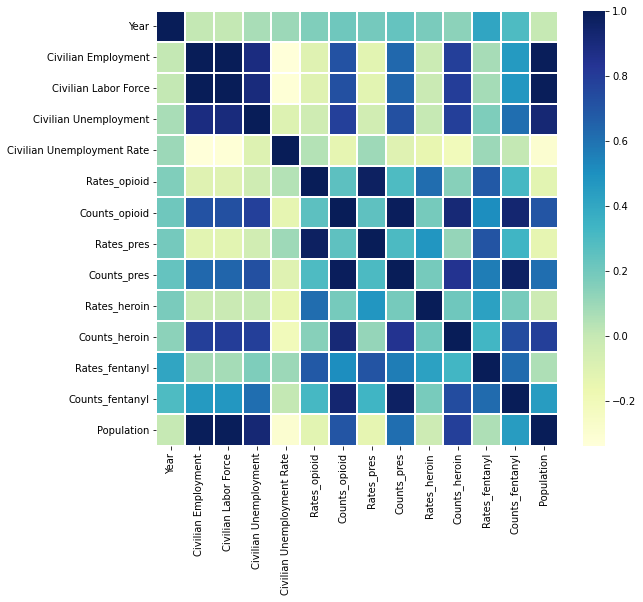

In [109]:
corrmat_2 = emp_op_pop.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat_2, ax = ax, cmap ="YlGnBu", linewidths = 0.1);

In [110]:
emp_op_pop["Rates_opioid"].max()

44.51

In [75]:
emp_op_pop.groupby(["County","Population"])["Rates_opioid"].nlargest(5)

County    Population     
Alameda   1682353.0   5       8.09
                      4       5.75
                      0       3.82
                      3       3.10
                      1       2.81
                             ...  
Tuolumne  55620.0     192    27.68
                      193    11.34
                      194     9.47
                      197     3.48
                      195     2.52
Name: Rates_opioid, Length: 165, dtype: float64

In [113]:
poverty = pd.read_csv("../data/Merged_deaths_hospital_poverty_by_county.csv", index_col=[0])

In [115]:
poverty = poverty[['County', 'CPM_rate', 'CPM_number']].copy()

In [116]:
poverty

,County,CPM_rate,CPM_number
0,Los Angeles,20.8,2061100.0
1,Orange,19.1,595800.0
2,San Bernardino,15.3,323700.0
3,San Diego,17.8,576600.0
4,Riverside,16.1,388300.0
5,Alameda,14.1,229400.0
6,Santa Clara,14.3,271500.0
7,Kern,16.7,145000.0
8,San Francisco,17.0,146500.0
9,Sacramento,14.8,224500.0


In [135]:
all_deaths_by_county

,County,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
0,Alameda,3.82,68.0,2015,2.73,50.0,0.66,11.0,0.24,4.0
1,Alpine,0.00,0.0,2015,0.00,0.0,0.00,0.0,0.00,0.0
2,Amador,3.75,2.0,2015,3.75,2.0,0.00,0.0,0.00,0.0
3,Butte,7.48,18.0,2015,6.51,16.0,0.44,1.0,0.33,1.0
4,Calaveras,17.97,9.0,2015,14.25,7.0,3.28,1.0,2.81,1.0
...,...,...,...,...,...,...,...,...,...,...
325,Sutter,10.35,11.0,2020,7.75,8.0,4.74,5.0,3.83,4.0
326,Tehama,3.38,2.0,2020,1.04,1.0,2.34,1.0,1.04,1.0
327,Trinity,0.00,0.0,2020,0.00,0.0,0.00,0.0,0.00,0.0
328,Tulare,8.22,39.0,2020,8.04,38.0,0.18,1.0,6.25,29.0


In [143]:
new_death = all_deaths_by_county.copy()

In [152]:
death_2017_2019 = new_death[   (new_death["Year"] == 2017) | (new_death["Year"] == 2018) | (new_death["Year"] == 2019)   ]

In [153]:
death_2017_2019

,County,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
110,Alameda,2.03,37.0,2017,1.36,25.0,0.36,7.0,0.32,6.0
111,Alpine,0.00,0.0,2017,0.00,0.0,0.00,0.0,0.00,0.0
112,Amador,2.71,2.0,2017,2.71,2.0,0.00,0.0,0.00,0.0
113,Butte,7.57,17.0,2017,6.26,13.0,1.31,4.0,0.61,1.0
114,Calaveras,0.86,1.0,2017,0.86,1.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
270,Sutter,2.50,3.0,2019,1.71,2.0,0.79,1.0,1.71,2.0
271,Tehama,1.02,1.0,2019,1.02,1.0,0.00,0.0,0.00,0.0
272,Trinity,19.65,2.0,2019,19.65,2.0,0.00,0.0,0.00,0.0
273,Tulare,2.52,12.0,2019,2.52,12.0,0.00,0.0,1.25,6.0


In [154]:
poverty_specific_opioid = pd.merge(poverty, death_2017_2019, on= ["County"])

In [156]:
poverty_specific_opioid.corr()

,CPM_rate,CPM_number,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
CPM_rate,1.000000e+00,4.347804e-01,0.128385,0.462593,8.951305e-14,0.026016,0.451987,0.179322,0.454575,0.104456,0.392411
CPM_number,4.347804e-01,1.000000e+00,-0.070290,0.919534,9.760539e-14,-0.075083,0.911314,0.013056,0.939079,0.062425,0.817349
Rates_opioid,1.283848e-01,-7.028997e-02,1.000000,0.064840,1.986428e-01,0.958714,0.078606,0.653747,0.041146,0.600568,0.105473
Counts_opioid,4.625934e-01,9.195341e-01,0.064840,1.000000,8.519257e-02,0.045883,0.996188,0.129272,0.984099,0.240068,0.942610
Year,8.951305e-14,9.760539e-14,0.198643,0.085193,1.000000e+00,0.211126,0.101390,0.165940,0.057168,0.375234,0.198408
Rates_pres,2.601603e-02,-7.508278e-02,0.958714,0.045883,2.111256e-01,1.000000,0.068301,0.517106,0.015403,0.606039,0.097453
Counts_pres,4.519869e-01,9.113140e-01,0.078606,0.996188,1.013902e-01,0.068301,1.000000,0.126535,0.970171,0.262312,0.953105
Rates_heroin,1.793221e-01,1.305616e-02,0.653747,0.129272,1.659396e-01,0.517106,0.126535,1.000000,0.150398,0.473051,0.141752
Counts_heroin,4.545753e-01,9.390785e-01,0.041146,0.984099,5.716802e-02,0.015403,0.970171,0.150398,1.000000,0.198013,0.909406
Rates_fentanyl,1.044562e-01,6.242533e-02,0.600568,0.240068,3.752342e-01,0.606039,0.262312,0.473051,0.198013,1.000000,0.340447


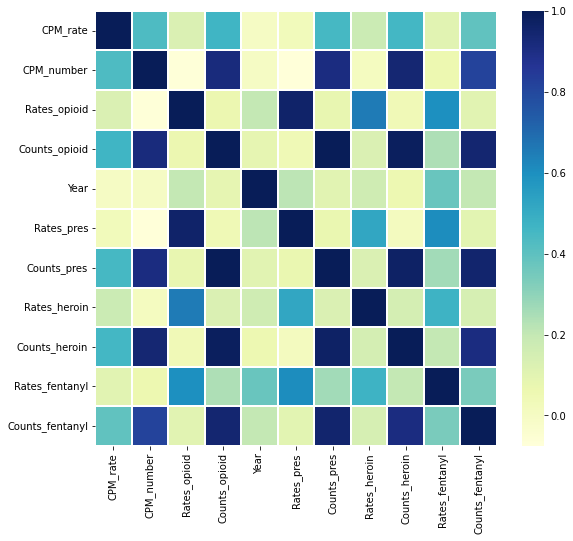

In [157]:
corrmat_3 = poverty_specific_opioid.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat_3, ax = ax, cmap ="YlGnBu", linewidths = 0.1);

In [184]:
poverty_specific_opioid

,County,CPM_rate,CPM_number,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
0,Los Angeles,20.8,2061100.0,4.05,447.0,2017,3.00,331.0,1.57,174.0,1.08,117.0
1,Los Angeles,20.8,2061100.0,4.57,497.0,2018,3.54,385.0,1.64,178.0,1.90,201.0
2,Los Angeles,20.8,2061100.0,6.70,707.0,2019,5.28,554.0,2.17,232.0,3.91,406.0
3,Orange,19.1,595800.0,7.50,255.0,2017,5.28,180.0,2.78,92.0,1.43,47.0
4,Orange,19.1,595800.0,7.46,252.0,2018,5.43,185.0,2.61,87.0,2.94,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Mariposa,13.2,23700.0,0.00,0.0,2018,0.00,0.0,0.00,0.0,0.00,0.0
152,Mariposa,13.2,23700.0,23.40,4.0,2019,23.40,4.0,0.00,0.0,0.00,0.0
153,Mono,13.2,23700.0,0.00,0.0,2017,0.00,0.0,0.00,0.0,0.00,0.0
154,Mono,13.2,23700.0,0.00,0.0,2018,0.00,0.0,0.00,0.0,0.00,0.0


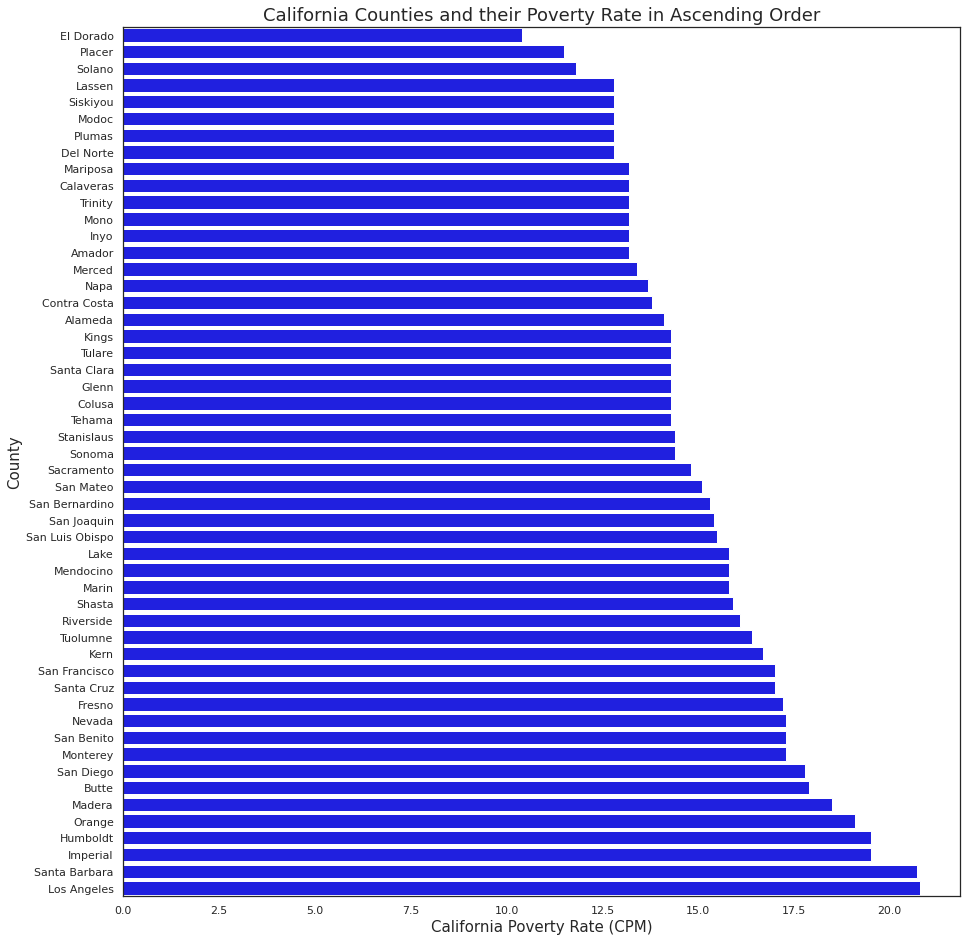

In [217]:
cpm_2019 = poverty_specific_opioid[poverty_specific_opioid["Year"] == 2019] 


sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
poverty_by_counties = sns.barplot(x= cpm_2019["CPM_rate"], 
                                  y= cpm_2019["County"],
                                  
                                  order= cpm_2019.sort_values("CPM_rate").County,
                                  orient= "h",
                                  color= "blue")

#set labels
plt.xlabel("California Poverty Rate (CPM)", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Poverty Rate in Ascending Order", size=18);

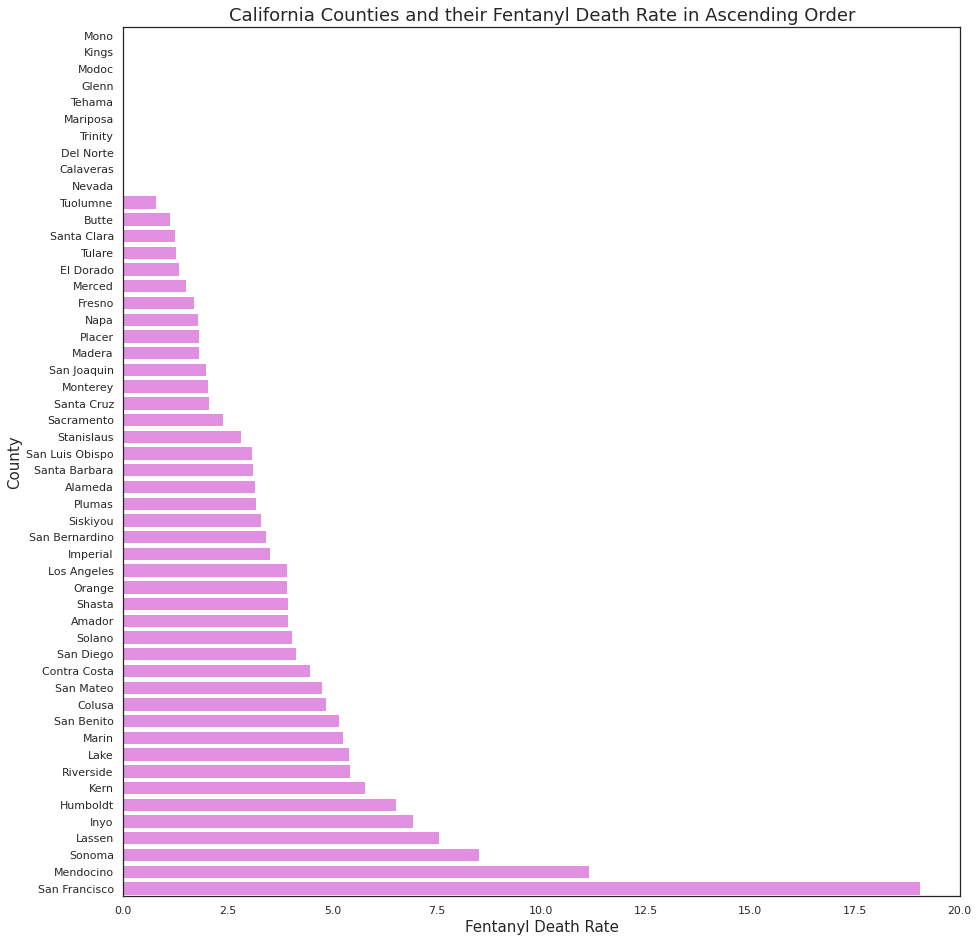

In [219]:
cpm_2019 = poverty_specific_opioid[poverty_specific_opioid["Year"] == 2019] 


sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
poverty_by_counties = sns.barplot(x= cpm_2019["Rates_fentanyl"], 
                                  y= cpm_2019["County"],
                                  
                                  order= cpm_2019.sort_values("Rates_fentanyl").County,
                                  orient= "h",
                                  color= "violet")

#set labels
plt.xlabel("Fentanyl Death Rate", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Fentanyl Death Rate in Ascending Order", size=18);

In [186]:
max_cpm = poverty_specific_opioid.groupby(["County"])["CPM_rate"].max()
poverty_specific_opioid[poverty_specific_opioid['CPM_rate'] == max_cpm.max()][['County', 'CPM_rate']]

,County,CPM_rate
0,Los Angeles,20.8
1,Los Angeles,20.8
2,Los Angeles,20.8
